In [15]:
import os
os.getcwd()

'd:\\temp\\cutup'

In [2]:
from affine_transform import apply_affine_transform
import numpy as np
import cv2
from matplotlib import pyplot as plt

随便找了张图，作了下旋转

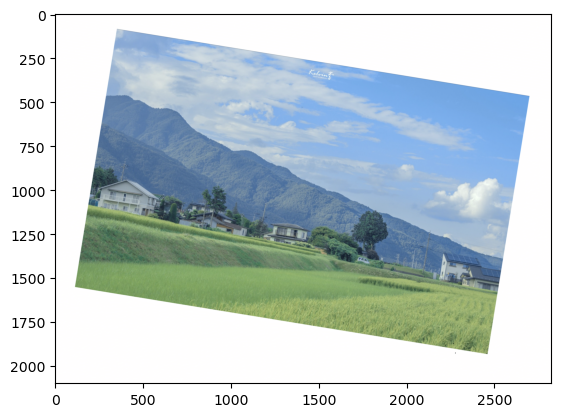

In [6]:
image = cv2.imread("./img/demo_rotate.png")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

original_points手动输的四个点

(2100, 2824, 3)
(1856, 2590, 3)


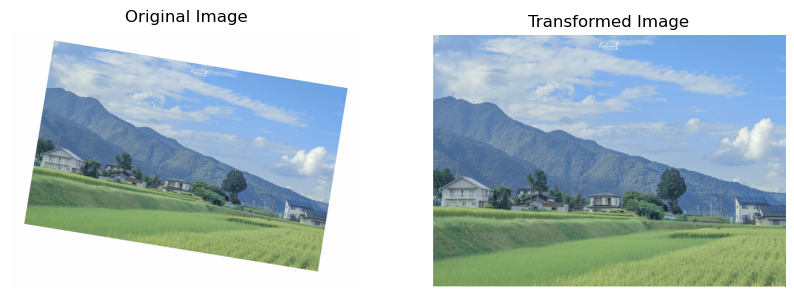

In [7]:

original_points = np.float32([[352, 82], [2702, 465], [112, 1557], [2462, 1938]])
transformed_image = apply_affine_transform(image, original_points)
print(image.shape)
print(transformed_image.shape)

# 一幅窗口显示原始图像和变换后的图像
# 显示结果
figura = plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(transformed_image, cv2.COLOR_BGR2RGB))
plt.title('Transformed Image')
plt.axis('off')

plt.show()


裁剪

In [13]:
from PIL import Image
from crop_v2 import slice_image,make_dir
# 图像路径
image_path = "img/demo_raw.png"
# 输出目录
output_dir = "sliced_images"
make_dir(output_dir)
# 切片尺寸
slice_height = 1024
slice_width = 1024

sliced_result = slice_image(image=image_path, output_dir=output_dir, slice_height=slice_height,
                                slice_width=slice_width,output_file_name="slice",verbose=True)


04/25/2024 17:47:44 - INFO - crop_v2 -   image.shape: (2590, 1856)
04/25/2024 17:47:44 - INFO - crop_v2 -   Num slices: 9 slice_height: 1024 slice_width: 1024


04/25/2024 17:47:45 - INFO - crop_v2 -   sliced image path: sliced_images\slice_1566_0_2590_1024.png
04/25/2024 17:47:45 - INFO - crop_v2 -   sliced image path: sliced_images\slice_820_0_1844_1024.png
04/25/2024 17:47:46 - INFO - crop_v2 -   sliced image path: sliced_images\slice_1566_820_2590_1844.png
04/25/2024 17:47:46 - INFO - crop_v2 -   sliced image path: sliced_images\slice_0_832_1024_1856.png
04/25/2024 17:47:46 - INFO - crop_v2 -   sliced image path: sliced_images\slice_0_0_1024_1024.png
04/25/2024 17:47:46 - INFO - crop_v2 -   sliced image path: sliced_images\slice_820_820_1844_1844.png
04/25/2024 17:47:46 - INFO - crop_v2 -   sliced image path: sliced_images\slice_820_832_1844_1856.png
04/25/2024 17:47:46 - INFO - crop_v2 -   sliced image path: sliced_images\slice_0_820_1024_1844.png
04/25/2024 17:47:46 - INFO - crop_v2 -   sliced image path: sliced_images\slice_1566_832_2590_1856.png


一幅窗口显示原始图像和变换后的图像

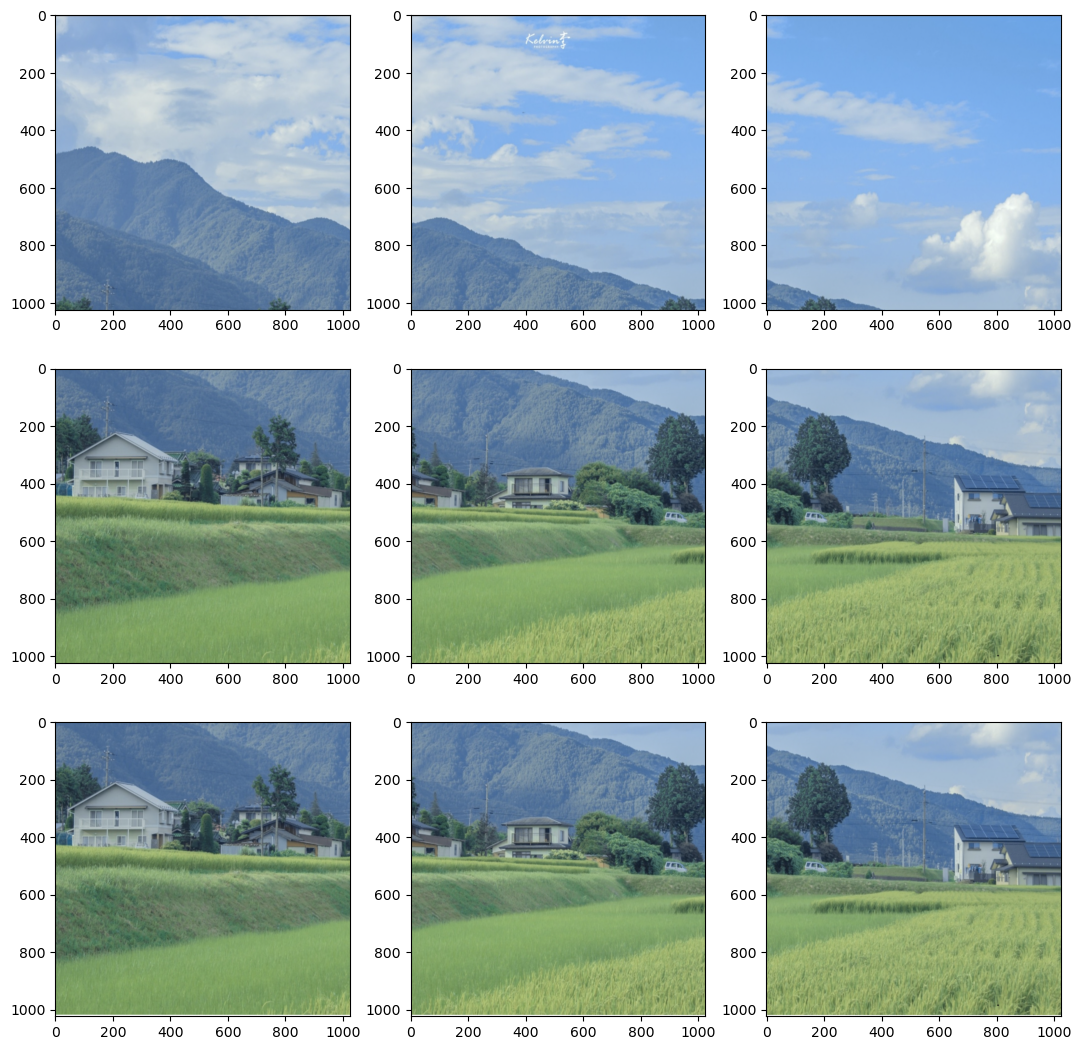

In [12]:
f, axarr = plt.subplots(3, 3, figsize=(13, 13))
num = 0
for i in range(3):
    for j in range(3):
        img = Image.open(output_dir + '/'+sliced_result.filenames[num])
        axarr[i, j].imshow(img)
        num += 1
plt.show()
plt.close()

做一下整合

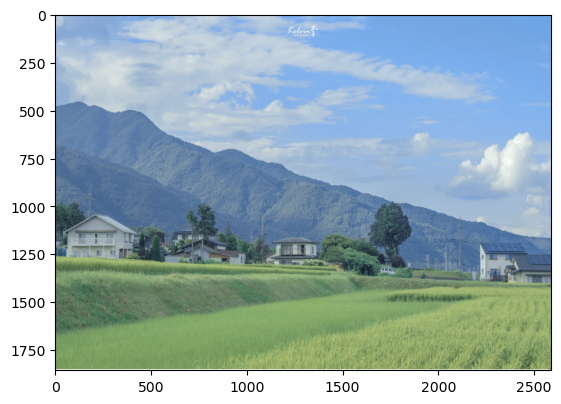

In [17]:
slice_dir = output_dir
#将sliced的图像整合为一张图像
image_files = os.listdir(slice_dir)

# 解析图片名称以获取坐标
def parse_coordinates(filename):
    parts = filename.split('.')
    coords = parts[0].split('_')
    x_start, y_start, x_end, y_end = map(int, coords[1:])
    return x_start, y_start, x_end, y_end

# 创建一个足够大的画布来容纳所有切片
max_x = max(parse_coordinates(file)[2] for file in image_files)
max_y = max(parse_coordinates(file)[3] for file in image_files)
canvas = Image.new('RGB', (max_x, max_y))

# 粘贴每张图片到画布上
for image_file in image_files:
    x_start, y_start, x_end, y_end = parse_coordinates(image_file)
    img = Image.open(slice_dir +'/'+ image_file)
    canvas.paste(img, (x_start, y_start))
plt.imshow(canvas)